In [222]:
import scipy.io as sio
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

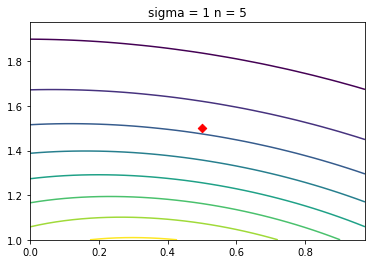

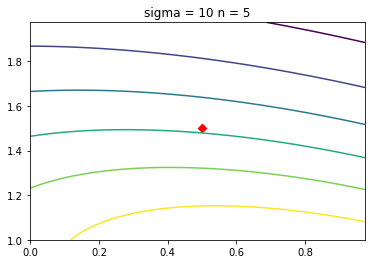

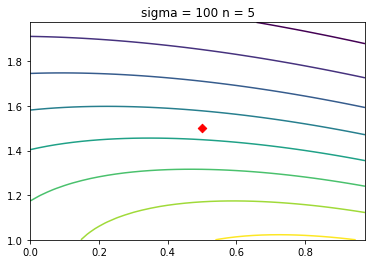

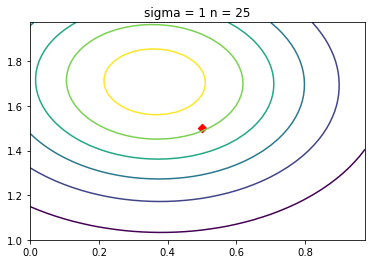

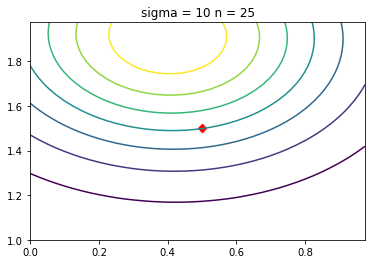

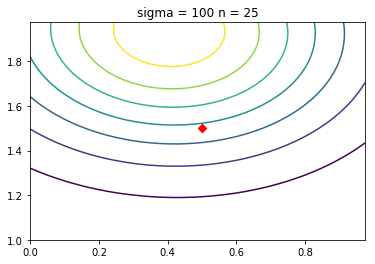

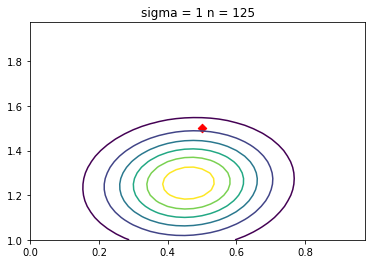

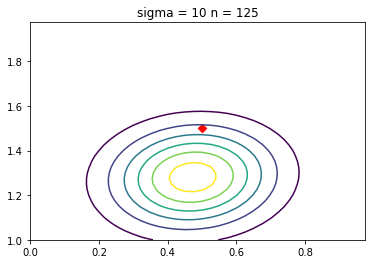

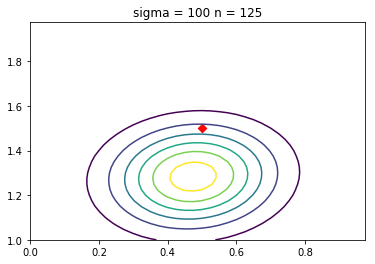

In [226]:
sigl = list([1, 10, 100])
sampleNuml = list([5, 25, 125])
for sampleNum in sampleNuml:
    trueModel = np.array([0.5, 1.5])
    delta = 0.025
    xg = np.arange(0, 1, delta)
    yg = np.arange(1, 2, delta)
    X, Y = np.meshgrid(xg, yg)
    z = np.random.normal(0,1,sampleNum)
    x = []
    y1 = np.random.uniform(-1,1,sampleNum)
    y2 = np.random.uniform(-1,1,sampleNum)
    x = np.concatenate((y1,y2),axis = 0)
    x.shape = (2,sampleNum)
    y = np.dot(x.T, trueModel) + z
    for sig in sigl:
        mean = np.dot(np.linalg.inv(np.dot(x,x.T)+ 1/sig * np.eye(2)),np.dot(x,y))
        var = np.linalg.inv(np.dot(x,x.T)+ 1/sig * np.eye(2))
        Z = mlab.bivariate_normal(X, Y, np.sqrt(var[0][0]), np.sqrt(var[1][1]), mean[0], mean[1],var[0][1])
        plt.figure()
        CS = plt.contour(X, Y, Z)
        #plt.clabel(CS, inline=1, fontsize=10)
        plt.title('sigma = {} n = {}'.format(sig,sampleNum))
        plt.scatter(trueModel[0],trueModel[1],marker = 'D',c = 'red')
plt.show()